# Create Dataset

## Create basic Params
Creating the basic dataset attributes.

In [1]:
folder_name = 'ikea_drill_screw'
TRAIN_COUNT = 800
VAL_COUNT = 200
IMAGE_SIZE = 512
INPUT_PATH = '../datasets/{}/input'.format(folder_name)
VAL_PATH = '../datasets/{}/val'.format(folder_name)
TRAIN_PATH = '../datasets/{}/train'.format(folder_name)
DI_PATH = INPUT_PATH + '/dataset_info.json'

## Create Training Set

In [2]:
MASK_DEF_PATH = TRAIN_PATH + '/mask_definitions.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {TRAIN_PATH} --count {TRAIN_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}

../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Create Validation Set

In [3]:
MASK_DEF_PATH = VAL_PATH + '/mask_definitions.json'
DI_PATH = INPUT_PATH + '/dataset_info.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {VAL_PATH} --count {VAL_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}


../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Preview the generated datasets

In [4]:
import os
import sys
import numpy as np
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from src import coco_trainer
from mrcnn import visualize


dataset_train = coco_trainer.CocoLikeDataset()
dataset_train.load_data(TRAIN_PATH+'/coco_instances.json',TRAIN_PATH+'/images')
dataset_train.prepare()

dataset_val = coco_trainer.CocoLikeDataset()
dataset_val.load_data(VAL_PATH+'/coco_instances.json',VAL_PATH+'/images')
dataset_val.prepare()

Using TensorFlow backend.


Displaying examples from training dataset:


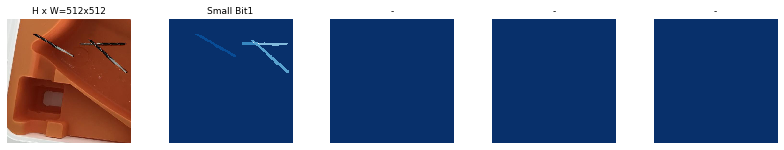

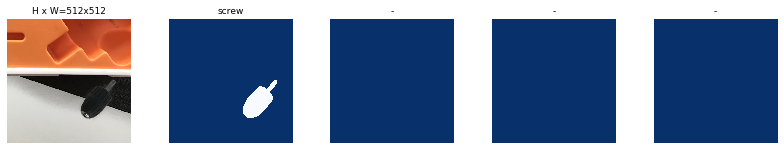

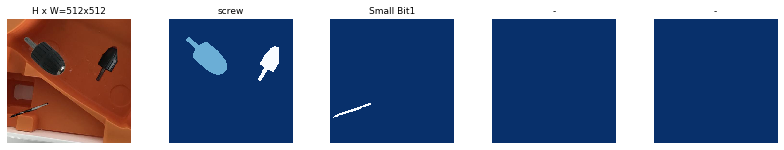

Displaying examples from validation dataset:


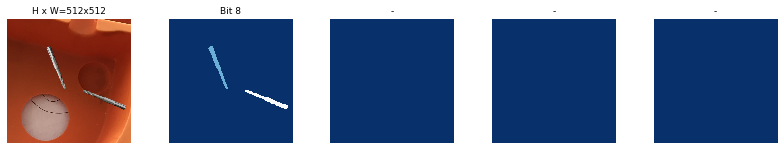

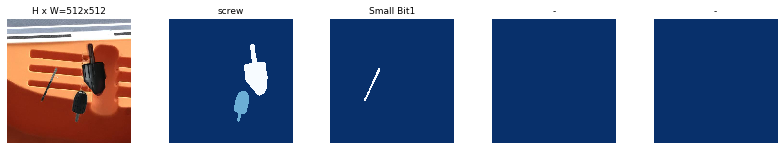

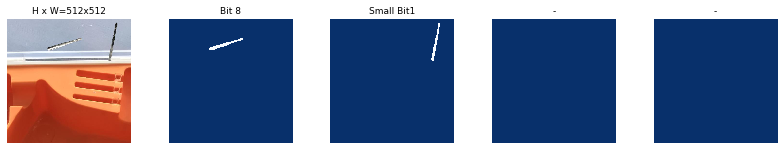

In [5]:
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Sync to S3

In [6]:
!aws s3 sync ../datasets s3://dkitdatasets --delete

upload: ../datasets/ikea_drill_screw/.DS_Store to s3://dkitdatasets/ikea_drill_screw/.DS_Store
upload: ../datasets/ikea_drill_screw/train/.DS_Store to s3://dkitdatasets/ikea_drill_screw/train/.DS_Store
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_0462.png to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_0462.png
upload: ../datasets/ikea_drill_screw/test/.DS_Store to s3://dkitdatasets/ikea_drill_screw/test/.DS_Store
upload: ../datasets/ikea_drill_screw/train/images/00000000.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000000.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000001.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000001.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000002.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000002.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000003.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000003.jpg
up

upload: ../datasets/ikea_drill_screw/train/images/00000058.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000058.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000053.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000053.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000061.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000061.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000060.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000060.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000042.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000042.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000059.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000059.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000066.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000066.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000056.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/input/backgrounds/IMG_1112.png to s3://dkitdatasets/ikea_drill_screw/input/backgrounds/IMG_1112.png
upload: ../datasets/ikea_drill_screw/train/images/00000116.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000116.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000123.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000123.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000128.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000128.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000126.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000126.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000127.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000127.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000129.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000129.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000124.jpg to s3://dkitdatasets/ikea_drill_screw/

upload: ../datasets/ikea_drill_screw/train/images/00000187.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000187.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000181.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000181.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000188.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000188.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000190.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000190.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000189.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000189.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000194.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000194.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000192.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000192.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000191.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000251.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000251.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000255.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000255.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000245.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000245.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000253.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000253.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000254.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000254.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000256.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000256.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000257.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000257.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000260.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000317.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000317.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000300.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000300.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000318.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000318.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000319.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000319.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000320.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000320.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000322.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000322.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000321.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000321.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000316.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000384.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000384.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000382.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000382.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000351.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000351.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000385.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000385.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000386.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000386.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000391.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000391.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000390.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000390.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000393.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000438.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000438.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000448.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000448.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000442.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000442.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000449.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000449.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000453.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000453.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000456.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000456.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000451.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000451.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000454.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000520.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000520.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000518.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000518.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000498.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000498.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000499.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000499.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000515.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000515.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000521.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000521.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000522.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000522.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000519.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000584.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000584.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000582.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000582.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000583.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000583.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000581.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000581.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000585.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000585.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000586.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000586.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000578.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000578.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000587.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000649.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000649.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000642.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000642.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000652.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000652.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000650.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000650.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000653.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000653.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000655.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000655.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000648.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000648.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000656.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000715.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000715.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000713.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000713.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000720.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000720.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000718.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000718.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000719.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000719.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000723.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000723.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000726.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000726.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000727.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000779.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000779.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000783.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000783.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000785.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000785.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000788.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000788.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000786.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000786.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000787.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000787.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000781.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000781.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000793.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/masks/00000050.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000050.png
upload: ../datasets/ikea_drill_screw/train/masks/00000045.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000045.png
upload: ../datasets/ikea_drill_screw/train/masks/00000049.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000049.png
upload: ../datasets/ikea_drill_screw/train/masks/00000043.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000043.png
upload: ../datasets/ikea_drill_screw/train/masks/00000052.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000052.png
upload: ../datasets/ikea_drill_screw/train/masks/00000051.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000051.png
upload: ../datasets/ikea_drill_screw/train/masks/00000055.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000055.png
upload: ../datasets/ikea_drill_screw/train/masks/00000058.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000058.png


upload: ../datasets/ikea_drill_screw/train/masks/00000116.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000116.png
upload: ../datasets/ikea_drill_screw/train/masks/00000117.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000117.png
upload: ../datasets/ikea_drill_screw/train/masks/00000118.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000118.png
upload: ../datasets/ikea_drill_screw/train/masks/00000119.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000119.png
upload: ../datasets/ikea_drill_screw/train/masks/00000122.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000122.png
upload: ../datasets/ikea_drill_screw/train/masks/00000124.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000124.png
upload: ../datasets/ikea_drill_screw/train/masks/00000126.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000126.png
upload: ../datasets/ikea_drill_screw/train/masks/00000123.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000123.png


upload: ../datasets/ikea_drill_screw/train/masks/00000185.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000185.png
upload: ../datasets/ikea_drill_screw/train/masks/00000180.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000180.png
upload: ../datasets/ikea_drill_screw/train/masks/00000183.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000183.png
upload: ../datasets/ikea_drill_screw/train/masks/00000177.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000177.png
upload: ../datasets/ikea_drill_screw/train/masks/00000188.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000188.png
upload: ../datasets/ikea_drill_screw/train/masks/00000189.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000189.png
upload: ../datasets/ikea_drill_screw/train/masks/00000190.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000190.png
upload: ../datasets/ikea_drill_screw/train/masks/00000191.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000191.png


upload: ../datasets/ikea_drill_screw/train/masks/00000251.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000251.png
upload: ../datasets/ikea_drill_screw/train/masks/00000246.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000246.png
upload: ../datasets/ikea_drill_screw/train/masks/00000253.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000253.png
upload: ../datasets/ikea_drill_screw/train/masks/00000252.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000252.png
upload: ../datasets/ikea_drill_screw/train/masks/00000258.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000258.png
upload: ../datasets/ikea_drill_screw/train/masks/00000254.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000254.png
upload: ../datasets/ikea_drill_screw/train/masks/00000255.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000255.png
upload: ../datasets/ikea_drill_screw/train/masks/00000261.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000261.png


upload: ../datasets/ikea_drill_screw/train/masks/00000310.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000310.png
upload: ../datasets/ikea_drill_screw/train/masks/00000316.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000316.png
upload: ../datasets/ikea_drill_screw/train/masks/00000320.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000320.png
upload: ../datasets/ikea_drill_screw/train/masks/00000326.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000326.png
upload: ../datasets/ikea_drill_screw/train/masks/00000321.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000321.png
upload: ../datasets/ikea_drill_screw/train/masks/00000323.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000323.png
upload: ../datasets/ikea_drill_screw/train/masks/00000324.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000324.png
upload: ../datasets/ikea_drill_screw/train/masks/00000325.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000325.png


upload: ../datasets/ikea_drill_screw/train/masks/00000387.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000387.png
upload: ../datasets/ikea_drill_screw/train/masks/00000388.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000388.png
upload: ../datasets/ikea_drill_screw/train/masks/00000390.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000390.png
upload: ../datasets/ikea_drill_screw/train/masks/00000392.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000392.png
upload: ../datasets/ikea_drill_screw/train/masks/00000394.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000394.png
upload: ../datasets/ikea_drill_screw/train/masks/00000391.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000391.png
upload: ../datasets/ikea_drill_screw/train/masks/00000396.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000396.png
upload: ../datasets/ikea_drill_screw/train/masks/00000389.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000389.png


upload: ../datasets/ikea_drill_screw/train/masks/00000458.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000458.png
upload: ../datasets/ikea_drill_screw/train/masks/00000455.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000455.png
upload: ../datasets/ikea_drill_screw/train/masks/00000460.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000460.png
upload: ../datasets/ikea_drill_screw/train/masks/00000452.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000452.png
upload: ../datasets/ikea_drill_screw/train/masks/00000464.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000464.png
upload: ../datasets/ikea_drill_screw/train/masks/00000461.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000461.png
upload: ../datasets/ikea_drill_screw/train/masks/00000462.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000462.png
upload: ../datasets/ikea_drill_screw/train/masks/00000463.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000463.png


upload: ../datasets/ikea_drill_screw/train/masks/00000522.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000522.png
upload: ../datasets/ikea_drill_screw/train/masks/00000515.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000515.png
upload: ../datasets/ikea_drill_screw/train/masks/00000523.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000523.png
upload: ../datasets/ikea_drill_screw/train/masks/00000525.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000525.png
upload: ../datasets/ikea_drill_screw/train/masks/00000518.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000518.png
upload: ../datasets/ikea_drill_screw/train/masks/00000527.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000527.png
upload: ../datasets/ikea_drill_screw/train/masks/00000524.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000524.png
upload: ../datasets/ikea_drill_screw/train/masks/00000528.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000528.png


upload: ../datasets/ikea_drill_screw/train/masks/00000591.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000591.png
upload: ../datasets/ikea_drill_screw/train/masks/00000594.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000594.png
upload: ../datasets/ikea_drill_screw/train/masks/00000589.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000589.png
upload: ../datasets/ikea_drill_screw/train/masks/00000592.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000592.png
upload: ../datasets/ikea_drill_screw/train/masks/00000597.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000597.png
upload: ../datasets/ikea_drill_screw/train/masks/00000590.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000590.png
upload: ../datasets/ikea_drill_screw/train/masks/00000601.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000601.png
upload: ../datasets/ikea_drill_screw/train/masks/00000596.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000596.png


upload: ../datasets/ikea_drill_screw/train/masks/00000657.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000657.png
upload: ../datasets/ikea_drill_screw/train/masks/00000655.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000655.png
upload: ../datasets/ikea_drill_screw/train/masks/00000656.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000656.png
upload: ../datasets/ikea_drill_screw/train/masks/00000654.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000654.png
upload: ../datasets/ikea_drill_screw/train/masks/00000658.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000658.png
upload: ../datasets/ikea_drill_screw/train/masks/00000660.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000660.png
upload: ../datasets/ikea_drill_screw/train/masks/00000662.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000662.png
upload: ../datasets/ikea_drill_screw/train/masks/00000661.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000661.png


upload: ../datasets/ikea_drill_screw/train/masks/00000728.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000728.png
upload: ../datasets/ikea_drill_screw/train/masks/00000727.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000727.png
upload: ../datasets/ikea_drill_screw/train/masks/00000725.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000725.png
upload: ../datasets/ikea_drill_screw/train/masks/00000726.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000726.png
upload: ../datasets/ikea_drill_screw/train/masks/00000730.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000730.png
upload: ../datasets/ikea_drill_screw/train/masks/00000729.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000729.png
upload: ../datasets/ikea_drill_screw/train/masks/00000731.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000731.png
upload: ../datasets/ikea_drill_screw/train/masks/00000733.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000733.png


upload: ../datasets/ikea_drill_screw/train/masks/00000797.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000797.png
upload: ../datasets/ikea_drill_screw/train/masks/00000794.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000794.png
upload: ../datasets/ikea_drill_screw/train/masks/00000795.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000795.png
upload: ../datasets/ikea_drill_screw/train/masks/00000796.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000796.png
upload: ../datasets/ikea_drill_screw/train/masks/00000695.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000695.png
upload: ../datasets/ikea_drill_screw/train/masks/00000799.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000799.png
upload: ../datasets/ikea_drill_screw/train/masks/00000798.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000798.png
upload: ../datasets/ikea_drill_screw/train/masks/00000793.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000793.png


upload: ../datasets/ikea_drill_screw/val/images/00000062.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000062.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000063.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000063.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000061.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000061.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000066.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000066.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000064.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000064.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000065.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000065.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000067.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000067.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000034.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000034.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000132.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000132.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000121.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000121.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000130.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000130.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000131.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000131.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000133.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000133.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000138.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000138.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000145.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000145.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000140.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000140.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000197.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000197.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000196.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000196.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000176.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000176.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000198.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000198.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000134.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000134.jpg
upload: ../datasets/ikea_drill_screw/val/masks/00000003.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000003.png
upload: ../datasets/ikea_drill_screw/val/masks/00000005.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000005.png
upload: ../datasets/ikea_drill_screw/val/masks/00000004.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000004.png
upload: ../datasets/ik

upload: ../datasets/ikea_drill_screw/val/masks/00000060.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000060.png
upload: ../datasets/ikea_drill_screw/val/masks/00000066.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000066.png
upload: ../datasets/ikea_drill_screw/val/masks/00000070.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000070.png
upload: ../datasets/ikea_drill_screw/val/masks/00000068.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000068.png
upload: ../datasets/ikea_drill_screw/val/masks/00000071.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000071.png
upload: ../datasets/ikea_drill_screw/val/masks/00000079.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000079.png
upload: ../datasets/ikea_drill_screw/val/masks/00000069.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000069.png
upload: ../datasets/ikea_drill_screw/val/masks/00000073.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000073.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000127.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000127.png
upload: ../datasets/ikea_drill_screw/val/masks/00000135.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000135.png
upload: ../datasets/ikea_drill_screw/val/masks/00000138.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000138.png
upload: ../datasets/ikea_drill_screw/val/masks/00000137.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000137.png
upload: ../datasets/ikea_drill_screw/val/masks/00000141.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000141.png
upload: ../datasets/ikea_drill_screw/val/masks/00000134.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000134.png
upload: ../datasets/ikea_drill_screw/val/masks/00000140.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000140.png
upload: ../datasets/ikea_drill_screw/val/masks/00000144.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000144.png
upload: ../datasets/ikea_drill_s